## WebScraping_HW

## 1. Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.


In [1]:
# importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.yelp.com/search?find_desc=Restaurants&l=a%3A38.7964144%2C-90.8495939%2C27.346&start=0'
# we are using requests library to get response from browser
response = requests.get(url)
response

<Response [200]>

In [17]:
# Yay! Response 200 says our request was successful
# extracting response as HTML data
html_data = response.text

# creating an object for beautiful soup
# giving HTML data to soup to convert it as a useful data
soup = BeautifulSoup(html_data)

In [5]:
# getting all divs
all_divs = soup.find_all("div",class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
for i in all_divs:
    names = i.find('a', class_='css-1422juy').text
    print(names)

Rosy’s cakes and Paco’s Tacos
Village Cafe
Sushi Sen
El Mezon
Q64
Country Pride
Sadie’s
Dog Prairie Tavern
Pizza Ranch
Rizzo’s Bar & Grill


In [95]:
# printing title
#title = soup.find('span',class_='raw__09f24__T4Ezm').text
soup.title.text

'Restaurants MO, MO 63385 - Last Updated February 2022 - Yelp'

In [2]:
# function to scrape yelp data for restaurants near my location
def my_function():
    # importing necessary libraries
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    names = []
    no_of_reviews = []
    rating = []
    category=[]
    for page in range(0,50,10):
        url=f'https://www.yelp.com/search?find_desc=Restaurants&l=a%3A38.7964144%2C-90.8495939%2C27.346&start={page}'
        soup = BeautifulSoup(requests.get(url).text,'html.parser')
        
        try:
            
            all_divs = soup.find_all("div",class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for i in all_divs:
                rest_names = i.find('a', class_='css-1422juy').text
                names.append(rest_names)
            
            
            review = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for i in review:
                reviews = i.find('span', class_="reviewCount__09f24__tnBk4 css-1e4fdj9").text
                no_of_reviews.append(reviews)

            
            rating_star = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ margin-r1__09f24__rN_ga border-color--default__09f24__NPAKY")
            for i in rating_star:
                for j in i:
                    ratings = j.div['aria-label']
                    rating.append(ratings)

            price_category = soup.find_all("div",class_="priceCategory__09f24__svarC iaPriceCategory__09f24__GPx_c display--inline-block__09f24__fEDiJ margin-t1__09f24__w96jn border-color--default__09f24__NPAKY")
            
            for i in price_category:
                p_tags = i.find_all('p', class_='css-1p8aobs')
                categoryTemp = []
                for j in p_tags:
                    categoryTemp.append(j.getText())
                category.append(categoryTemp)
        except Exception as e:
            print(e)

    # Creating Data frame
    dictionary = {'Restaurant_Name':names,
                'Categories':category,
                'no_of_reviews':no_of_reviews,
                'Rating':rating}

    df = pd.DataFrame.from_dict(dictionary)
    return df 


# calling function        
my_function()

,Restaurant_Name,Categories,no_of_reviews,Rating
0,The Tattooed Dog,"[American (New), Burgers, Music Venues]",273,4 star rating
1,Stone Summit Steak and Seafood,"[American (Traditional), Seafood, Steakhouses]",192,3 star rating
2,Sauce on the Side,"[Italian, Salad, Beer, Wine & Spirits]",56,4.5 star rating
3,909 Public House,"[Burgers, Pizza, Sandwiches]",103,3.5 star rating
4,Soulard Gyro,"[Falafel, Greek, Wraps]",30,4.5 star rating
5,Prados,[Latin American],128,4 star rating
6,Wentzville Family Diner,"[Breakfast & Brunch, American (New)]",37,4.5 star rating
7,BC’s Kitchen,[American (New)],170,4 star rating
8,The Grotto Grill,"[American (Traditional), Beer Bar, Cocktail Bars]",101,4.5 star rating
9,Syberg’s Wentzville,"[Sports Bars, American (Traditional), Chicken ...",31,2.5 star rating


## 2.Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .


* I have used this Approach to call my function:

    * Created a Python file containing my nearby_restaurants function.
    * Created another Python file and imported the previous Python file into it.
    * Call the functions defined in the imported file.
    
* By following the above steps, first I created rest_function py file and stored my function there.
* And then opened another py file named as restaurant and imported my function py file inside restaurant py file(sounds confusing?) 
    * from pyfile import function(in restaurant py file)

* Initial local host will print text of scraping restaurants data, /scrape endpoint won't print anything, /all endpoint will print the restaurant dictionary. I have attached screenshots below. And Please see the restaraunt py file for the code.


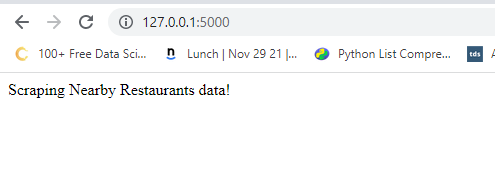

#### When i call /all endpoint, I can see 50 restaurants data in my localhost

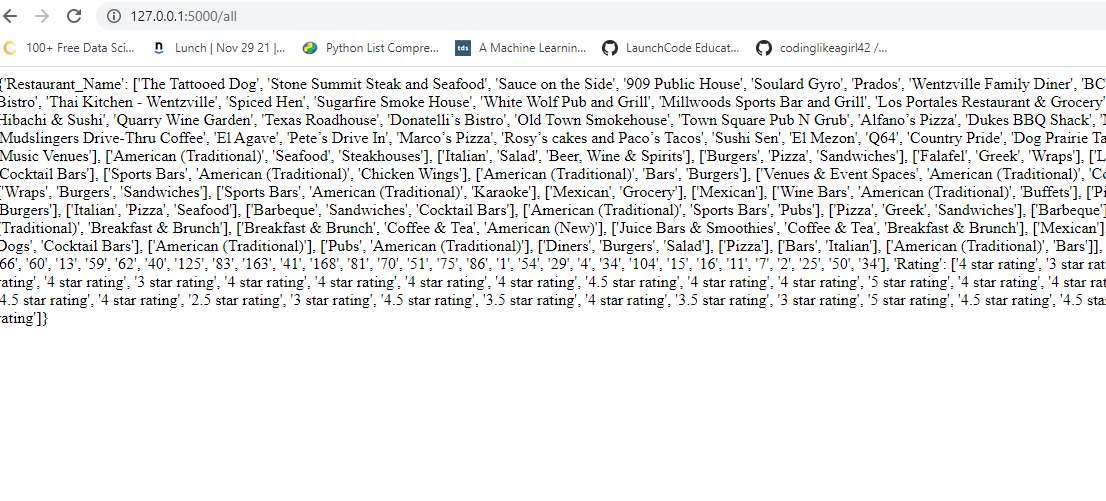

## 3.What is web scraping? Why is it helpful? What does it mean for your online presence?

#### Web Scraping

* We can import the datas that are locally. But what if our data is online?
* Web Scraping is a process of finding and extracting data from internet within short time.

#### Why Scraping web?

* Price comparison
* Academic Research
* Gather hotel restaurant reviews and ratings from sites like Trip advisor 
* Use sites like booking.com & Hotels.com to scrape hotel room price and information.
* When we need more data for our Machine Learning Algorithms

#### Tools and libraries 

* BeautifulSoup
* Scrapy
* Selenium
* Splinter

#### Steps in scraping

* First step is go to our desired site by making HTTP request and download the response we got.
* Once we get response, we need to parse HTML data into useful text using Beautiful Soup library
* After we extracted our data, we can store it in list, dictionaries or dataframes etc.

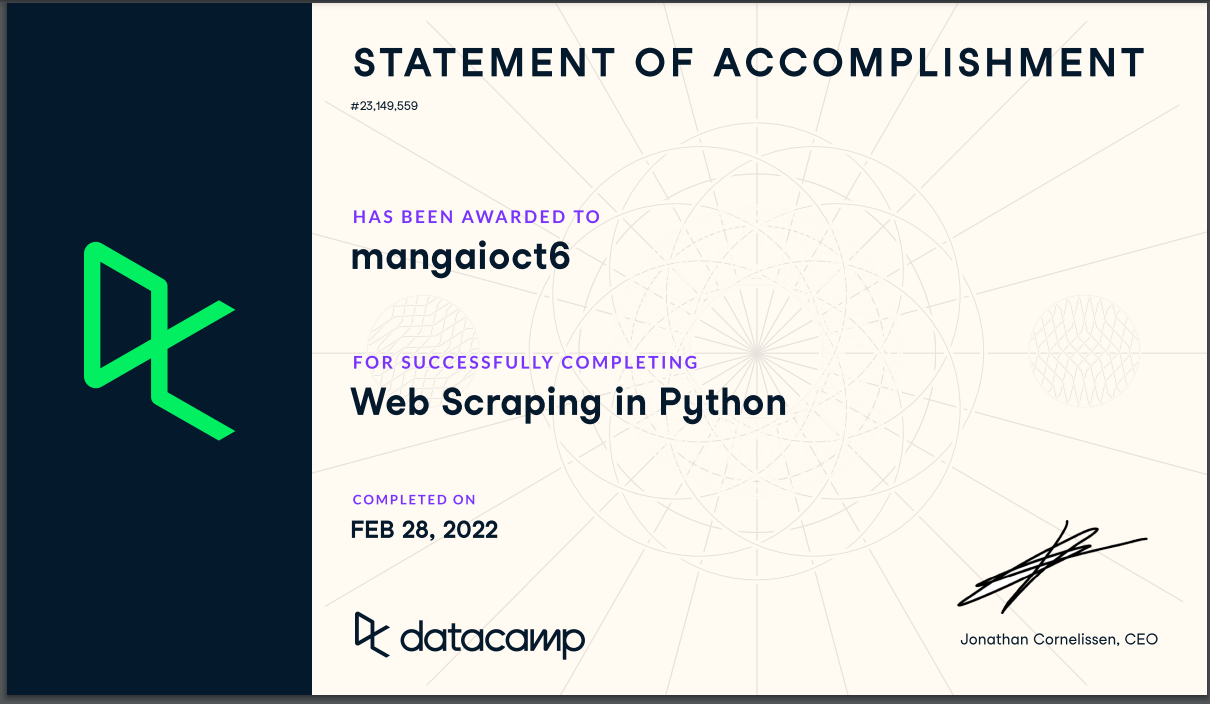

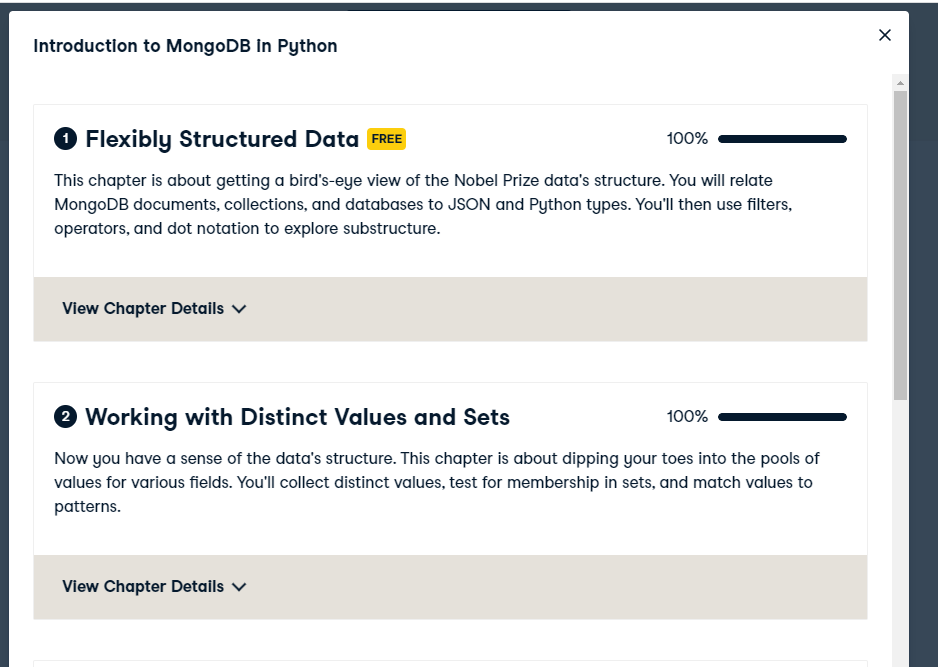